In [2]:
%load_ext autoreload
%autoreload 2

In [9]:
from utils.parse_csv import Parser
import matplotlib.pyplot as plt
import seaborn as sns
from metrics.BERTScoreEval import BERTScoreEval
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import re

In [4]:
sns.set_style("darkgrid")
sns.set_palette('husl')

In [5]:
parser = Parser()
berteval = BERTScoreEval()

Initalizing BERTScore Evaluator...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore Evaluator Initialized to cpu


In [10]:
def get_scores(dir):
    bert = [[], []]

    for i in tqdm(range(20), desc='getting berts'):
        f_path = f'{dir}/run{i+1}.csv'
        try:
            m1, m2 = parser.parse_free(f_path)
            bert[0].append(berteval.aggregate(m1))
            bert[1].append(berteval.aggregate(m2))
        except:
            print(f'error at: {f_path}')
            bert[0].append(np.nan)
            bert[1].append(np.nan)

    return bert
            

# Data for 3.5 turbo, anonymous countries

In [11]:
paths = ['/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-free-False-20-1.0',
         '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-free-True-20-1.0',
         '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-free-False-20-1.0',
         '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-free-True-20-1.0']

In [12]:
dfs = []
for path in paths:
    data = get_scores(path)
    df = pd.DataFrame(data).T
    df.columns = ['Move 1', 'Move 2']

    dfs.append(df)

for i, path in enumerate(paths):
    path = re.sub('outputs', 'consistency', path) + '/consistency.csv'
    dfs[i].to_csv(path)

getting berts:   0%|          | 0/20 [00:00<?, ?it/s]

getting berts:   0%|          | 0/20 [00:00<?, ?it/s]

getting berts:   0%|          | 0/20 [00:00<?, ?it/s]

getting berts:   0%|          | 0/20 [00:00<?, ?it/s]

In [13]:
df_35t_free_anon = get_scores(path)

getting berts:   0%|          | 0/20 [00:00<?, ?it/s]

In [18]:
df_35t_free_anon = pd.DataFrame(df_35t_free_anon).T
df_35t_free_anon.columns = ['Move 1', 'Move 2']

In [20]:
df_35t_free_anon = df_35t_free_anon.fillna(df_35t_free_anon.mean())

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and free responses and anonymous countries')

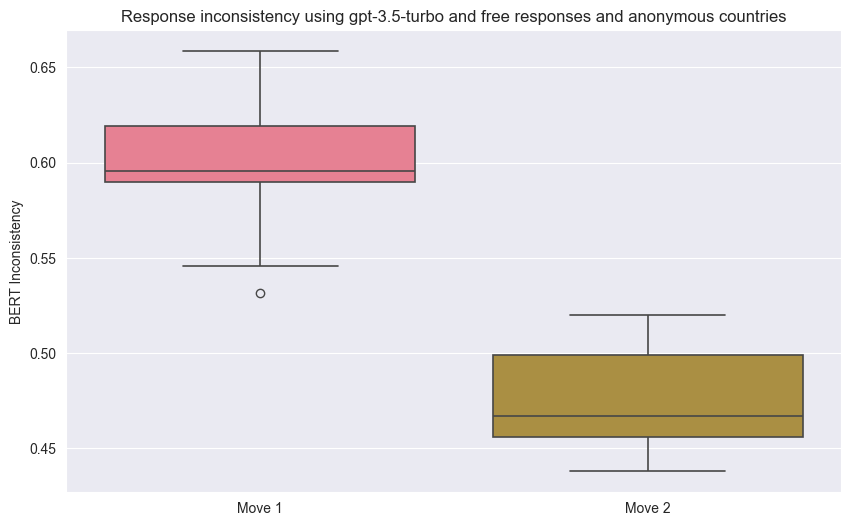

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_35t_free_anon, linewidth=1.2)
plt.ylabel('BERT Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and free responses and anonymous countries')

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and free responses and anonymous countries')

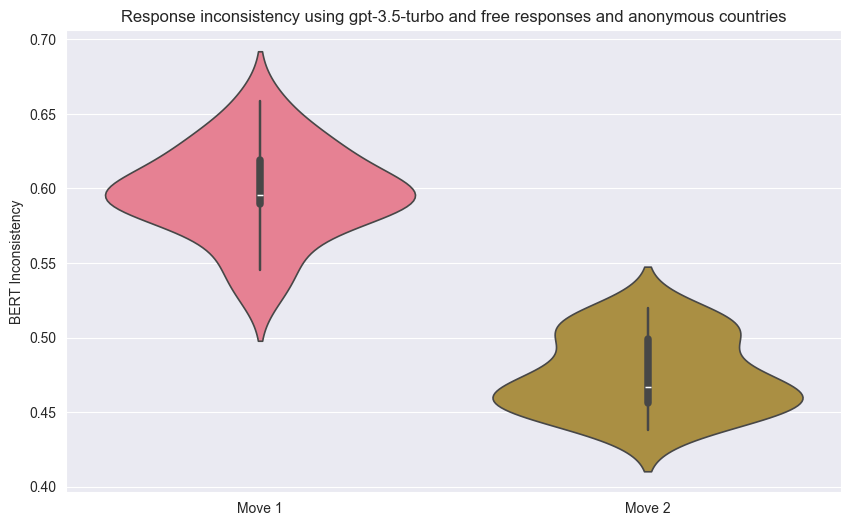

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(df_35t_free_anon, linewidth=1.2)
plt.ylabel('BERT Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and free responses and anonymous countries')

# Data for 3.5 turbo, explicit countries

In [28]:
path = '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-free-True-20-1.0'
df_35t_free_exp = get_scores(path)
df_35t_free_exp = pd.DataFrame(df_35t_free_exp).T
df_35t_free_exp.columns = ['Move 1', 'Move 2']
df_35t_free_exp = df_35t_free_exp.fillna(df_35t_free_exp.mean())

getting berts:   0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and free responses and explicit countries')

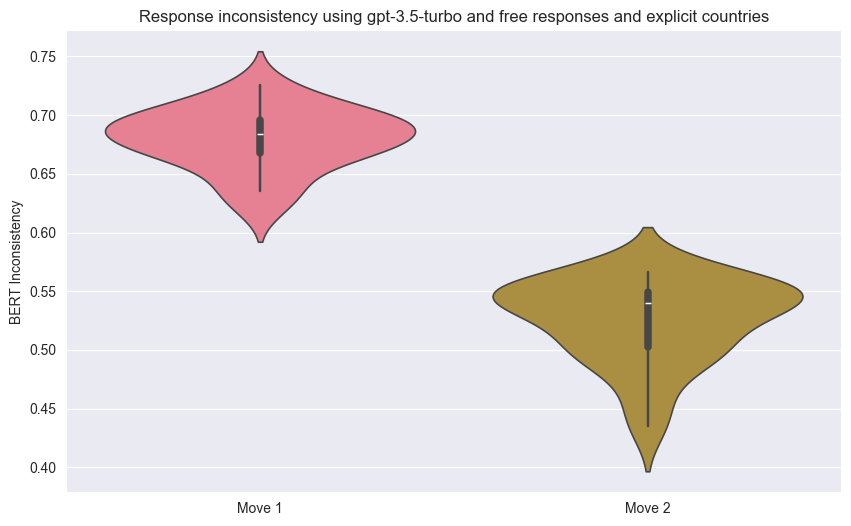

In [30]:
plt.figure(figsize=(10, 6))
sns.violinplot(df_35t_free_exp, linewidth=1.2)
plt.ylabel('BERT Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and free responses and explicit countries')

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and free responses and explicit countries')

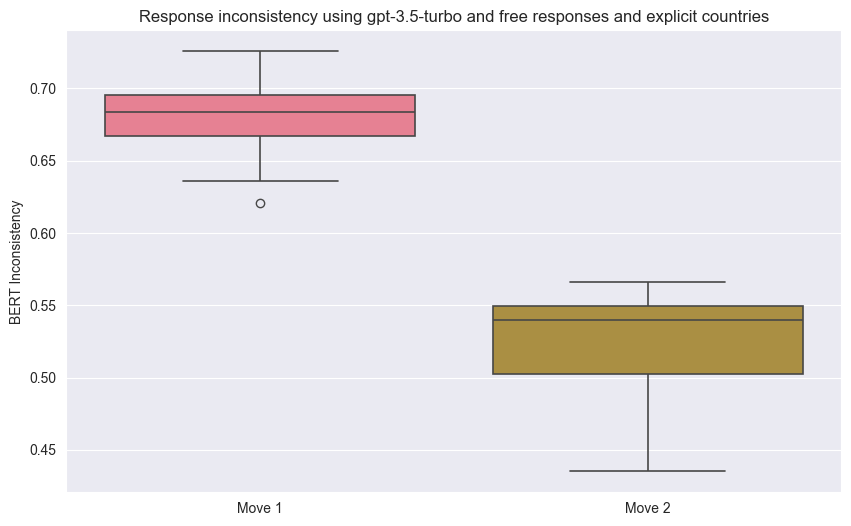

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_35t_free_exp, linewidth=1.2)
plt.ylabel('BERT Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and free responses and explicit countries')

In [34]:
path = '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-free-True-20-1.0'
df_4_free_exp = get_scores(path)
df_4_free_exp = pd.DataFrame(df_4_free_exp).T
df_4_free_exp.columns = ['Move 1', 'Move 2']
df_4_free_exp = df_4_free_exp.fillna(df_4_free_exp.mean())

getting berts:   0%|          | 0/20 [00:00<?, ?it/s]

In [35]:
path = '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-free-False-20-1.0'
df_4_free_anon = get_scores(path)
df_4_free_anon = pd.DataFrame(df_4_free_anon).T
df_4_free_anon.columns = ['Move 1', 'Move 2']
df_4_free_anon = df_4_free_anon.fillna(df_4_free_anon.mean())

getting berts:   0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Response inconsistency using gpt-4 and free responses and explicit countries')

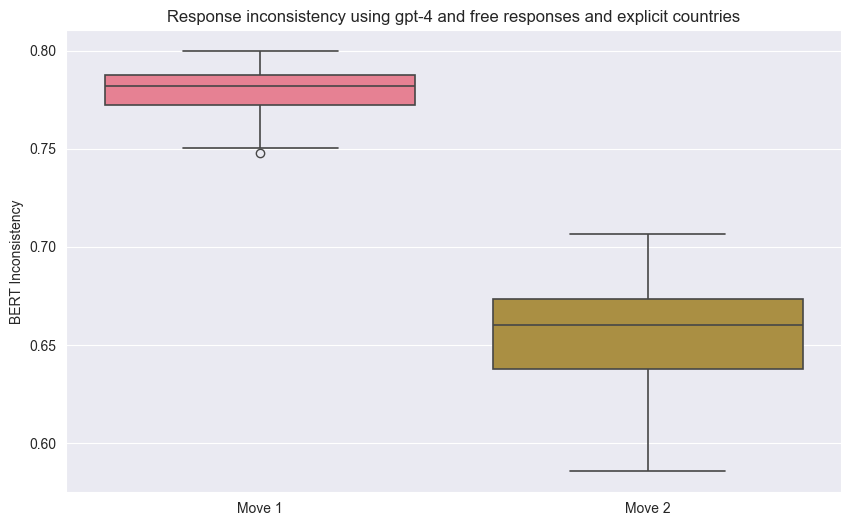

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_4_free_exp, linewidth=1.2)
plt.ylabel('BERT Inconsistency')
plt.title('Response inconsistency using gpt-4 and free responses and explicit countries')

Text(0.5, 1.0, 'Response inconsistency using gpt-4 and free responses and explicit countries')

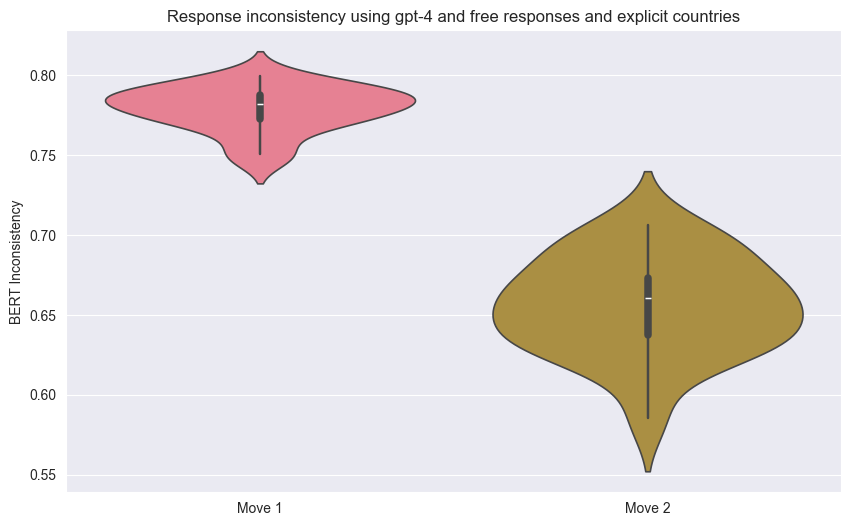

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(df_4_free_exp, linewidth=1.2)
plt.ylabel('BERT Inconsistency')
plt.title('Response inconsistency using gpt-4 and free responses and explicit countries')

Text(0.5, 1.0, 'Response inconsistency using gpt-4 and free responses and anonymous countries')

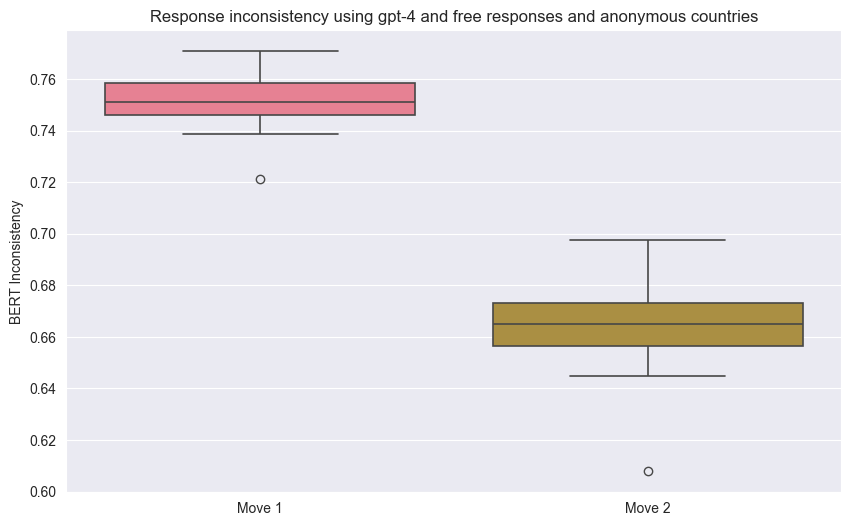

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_4_free_anon, linewidth=1.2)
plt.ylabel('BERT Inconsistency')
plt.title('Response inconsistency using gpt-4 and free responses and anonymous countries')

Text(0.5, 1.0, 'Response inconsistency using gpt-4 and free responses and anonymous countries')

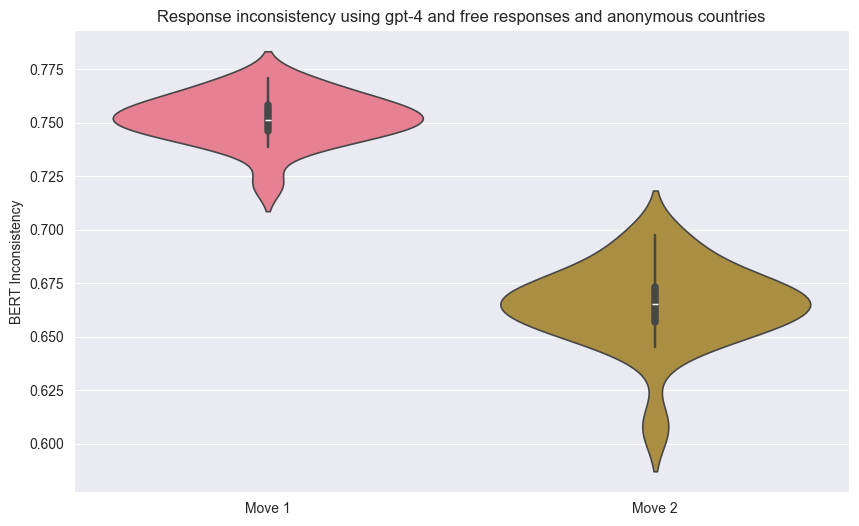

In [40]:
plt.figure(figsize=(10, 6))
sns.violinplot(df_4_free_anon, linewidth=1.2)
plt.ylabel('BERT Inconsistency')
plt.title('Response inconsistency using gpt-4 and free responses and anonymous countries')

In [43]:
move1s = pd.concat([df_35t_free_anon['Move 1'], df_35t_free_exp['Move 1'], df_4_free_anon['Move 1'], df_35t_free_exp['Move 1']], axis=1)
move1s.columns = [
    '3.5 turbo, anon',
    '3.5 turbo, exp',
    '4, anon',
    '4, exp'
]
move1s

,"3.5 turbo, anon","3.5 turbo, exp","4, anon","4, exp"
0,0.624048,0.708249,0.770767,0.708249
1,0.631974,0.725688,0.763288,0.725688
2,0.597705,0.642779,0.744204,0.642779
3,0.639497,0.635761,0.751270,0.635761
4,0.658486,0.702513,0.750995,0.702513
5,0.597657,0.668807,0.748715,0.668807
6,0.531434,0.679139,0.738705,0.679139
7,0.599290,0.710968,0.758552,0.710968
8,0.618165,0.689415,0.763376,0.689415
9,0.561672,0.620862,0.738663,0.620862


Text(0.5, 1.0, 'Response inconsistency on Move 1')

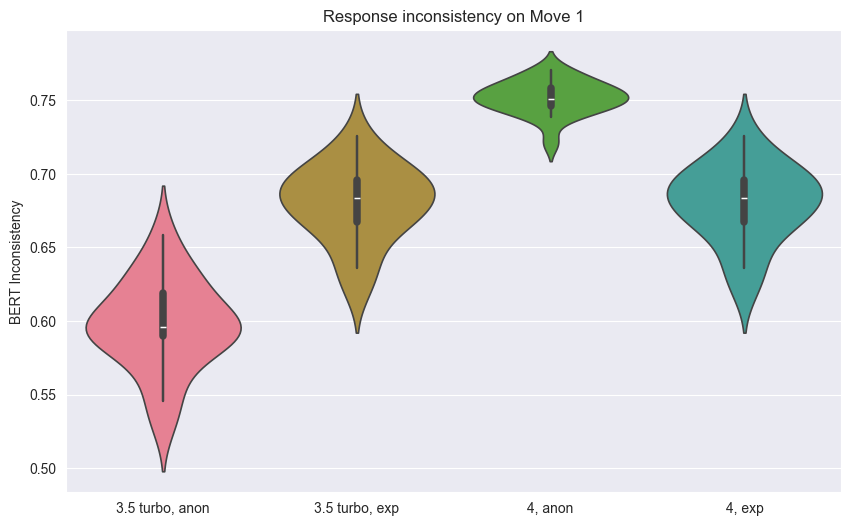

In [44]:
plt.figure(figsize=(10, 6))
sns.violinplot(move1s, linewidth=1.2)
plt.ylabel('BERT Inconsistency')
plt.title('Response inconsistency on Move 1')

Text(0.5, 1.0, 'Response inconsistency on Move 1')

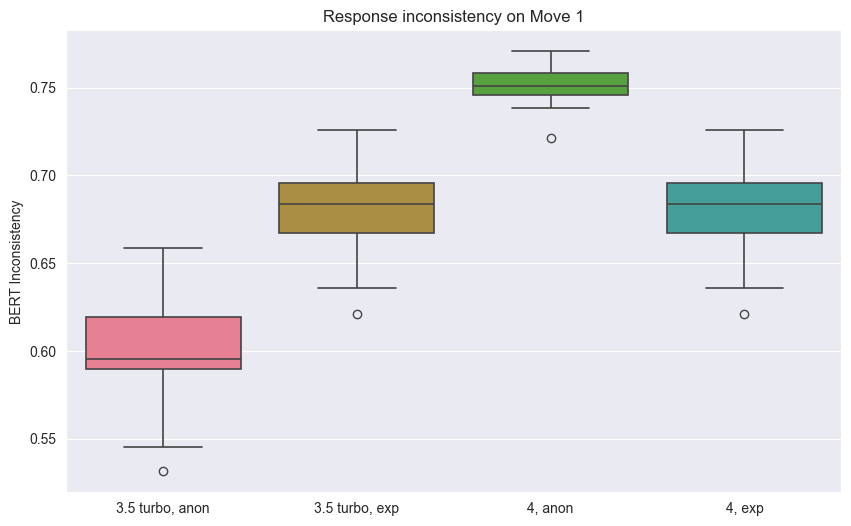

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(move1s, linewidth=1.2)
plt.ylabel('BERT Inconsistency')
plt.title('Response inconsistency on Move 1')

In [45]:
move2s = pd.concat([df_35t_free_anon['Move 2'], df_35t_free_exp['Move 2'], df_4_free_anon['Move 2'], df_35t_free_exp['Move 2']], axis=1)
move2s.columns = [
    '3.5 turbo, anon',
    '3.5 turbo, exp',
    '4, anon',
    '4, exp'
]
move2s

,"3.5 turbo, anon","3.5 turbo, exp","4, anon","4, exp"
0,0.483571,0.435165,0.651574,0.435165
1,0.452231,0.531370,0.668711,0.531370
2,0.463979,0.551811,0.644982,0.551811
3,0.468433,0.545635,0.665221,0.545635
4,0.474332,0.548926,0.656724,0.548926
5,0.453355,0.510292,0.662901,0.510292
6,0.512464,0.460718,0.692241,0.460718
7,0.448182,0.493566,0.682937,0.493566
8,0.508017,0.505682,0.697556,0.505682
9,0.462012,0.539137,0.669880,0.539137


Text(0.5, 1.0, 'Response inconsistency on Move 2')

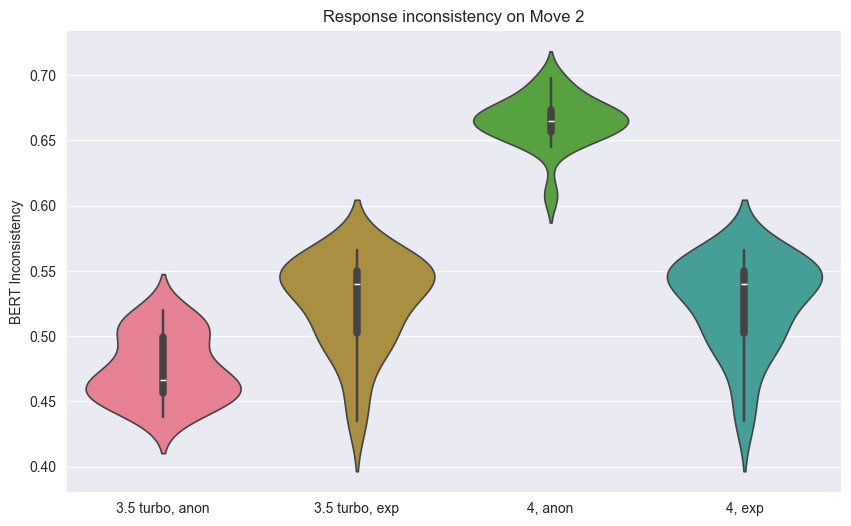

In [46]:
plt.figure(figsize=(10, 6))
sns.violinplot(move2s, linewidth=1.2)
plt.ylabel('BERT Inconsistency')
plt.title('Response inconsistency on Move 2')

Text(0.5, 1.0, 'Response inconsistency on Move 2')

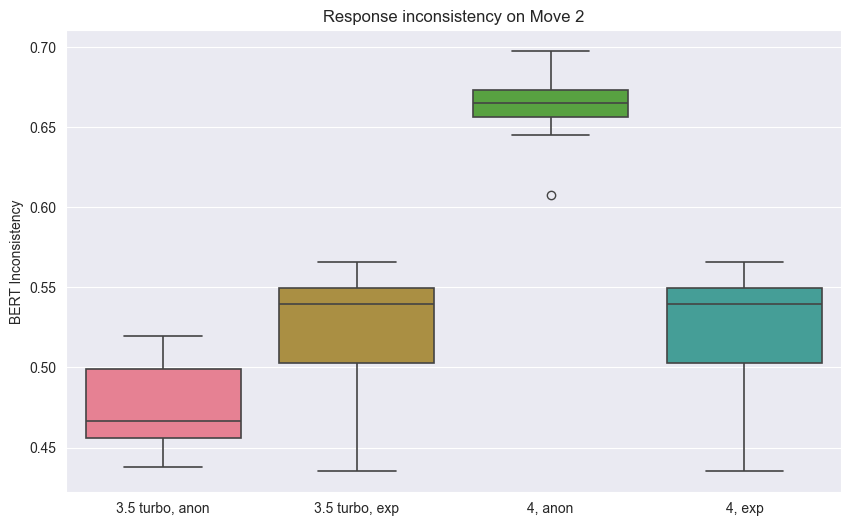

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(move2s, linewidth=1.2)
plt.ylabel('BERT Inconsistency')
plt.title('Response inconsistency on Move 2')

In [49]:
everything = pd.concat([df_35t_free_anon['Move 1'], df_35t_free_anon['Move 2'],
                        df_35t_free_exp['Move 1'], df_35t_free_exp['Move 2'],
                        df_4_free_anon['Move 1'], df_4_free_anon['Move 2'],
                        df_4_free_exp['Move 1'], df_4_free_exp['Move 2']], axis=1)
everything.columns = ['3.5tanon1', '3.5tanon2',
                      '3.5texp1', '3.5texp2',
                      '4anon1', '4anon2',
                      '4exp1', '4exp2']
everything

,3.5tanon1,3.5tanon2,3.5texp1,3.5texp2,4anon1,4anon2,4exp1,4exp2
0,0.624048,0.483571,0.708249,0.435165,0.770767,0.651574,0.785303,0.643681
1,0.631974,0.452231,0.725688,0.531370,0.763288,0.668711,0.785465,0.669574
2,0.597705,0.463979,0.642779,0.551811,0.744204,0.644982,0.783151,0.631777
3,0.639497,0.468433,0.635761,0.545635,0.751270,0.665221,0.761612,0.706496
4,0.658486,0.474332,0.702513,0.548926,0.750995,0.656724,0.771299,0.585577
5,0.597657,0.453355,0.668807,0.510292,0.748715,0.662901,0.789458,0.690963
6,0.531434,0.512464,0.679139,0.460718,0.738705,0.692241,0.750585,0.664890
7,0.599290,0.448182,0.710968,0.493566,0.758552,0.682937,0.786936,0.639375
8,0.618165,0.508017,0.689415,0.505682,0.763376,0.697556,0.791672,0.640352
9,0.561672,0.462012,0.620862,0.539137,0.738663,0.669880,0.780258,0.693478


Text(0.5, 1.0, 'Response inconsistencies')

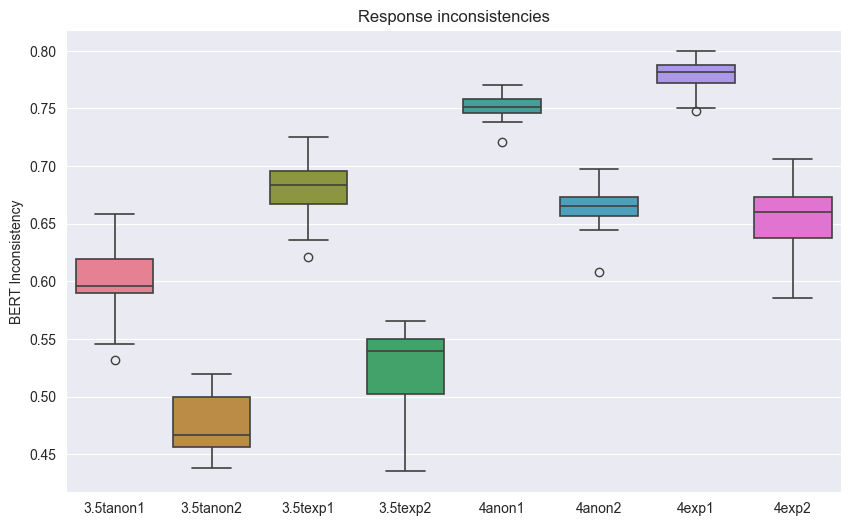

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(everything, linewidth=1.2)
plt.ylabel('BERT Inconsistency')
plt.title('Response inconsistencies')

Text(0.5, 1.0, 'Response inconsistencies')

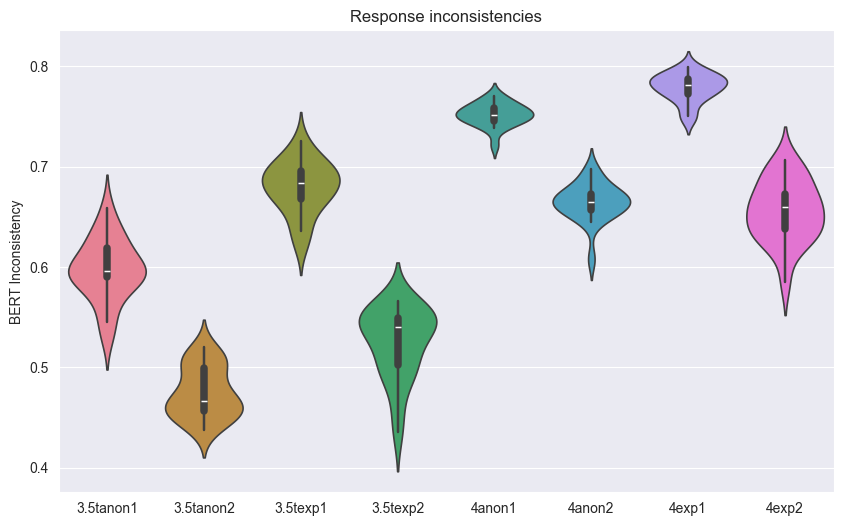

In [51]:
plt.figure(figsize=(10, 6))
sns.violinplot(everything, linewidth=1.2)
plt.ylabel('BERT Inconsistency')
plt.title('Response inconsistencies')

In [52]:
df_35t_free_anon

,Move 1,Move 2
0,0.624048,0.483571
1,0.631974,0.452231
2,0.597705,0.463979
3,0.639497,0.468433
4,0.658486,0.474332
5,0.597657,0.453355
6,0.531434,0.512464
7,0.599290,0.448182
8,0.618165,0.508017
9,0.561672,0.462012
